In [10]:
import matplotlib.pyplot as plt
import numpy as np

from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor
from src.utils.image_processing import calc_hist, calc_cdf, image_diff

inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'

def do_lab(img_name):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    img = inout.read_jpg(img_name)
    
    img_eqval = np.clip(processor.eqval_hist_correction(img), 0, 255).astype(np.uint8)
    img_eqval_normal = np.clip(processor.custom_hist_correction(img, np.random.normal(scale = 0.1,size=np.max(img))), 0, 255).astype(np.uint8)
    diff = processor.eqval_hist_correction(np.clip(image_diff(img, img_eqval, 'bilinear'), 0, 255))
    
    ax[0, 0].imshow(img, cmap='gray')
    ax[0, 1].imshow(img_eqval, cmap='gray')
    ax[1, 0].imshow(img_eqval_normal, cmap='gray')
    ax[1, 1].imshow(diff, cmap='gray')
    
    fig1, ax1 = plt.subplots(2, 2, figsize=(10, 10))
    ax1[0, 0].hist(img.ravel(),np.max(img),[0,np.max(img)])
    ax1[0, 1].hist(img_eqval.ravel(),np.max(img_eqval),[0,np.max(img_eqval)])
    ax1[1, 0].hist(img_eqval_normal.ravel(),np.max(img_eqval_normal),[0,np.max(img_eqval_normal)])
    ax1[1, 1].hist(diff.ravel(),np.max(diff),[0,np.max(diff)])

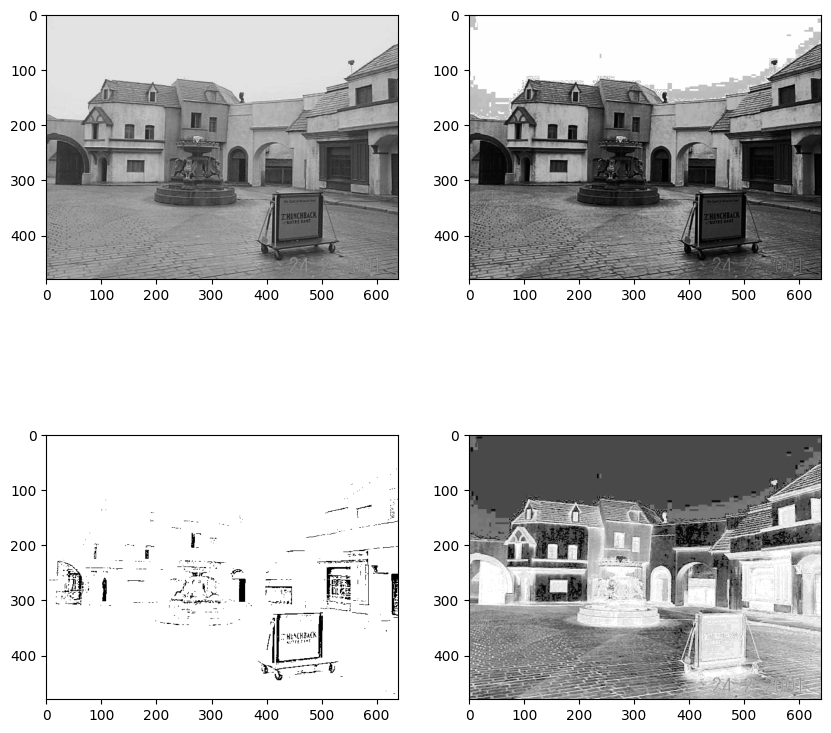

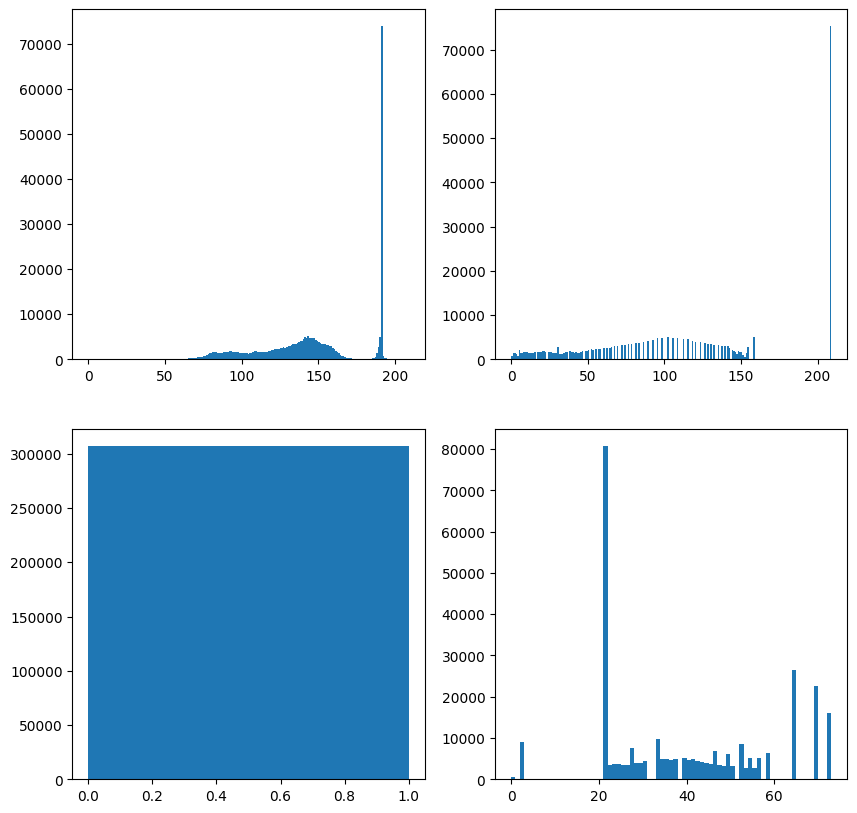

In [11]:
do_lab(img_path + 'HollywoodLC.jpg')

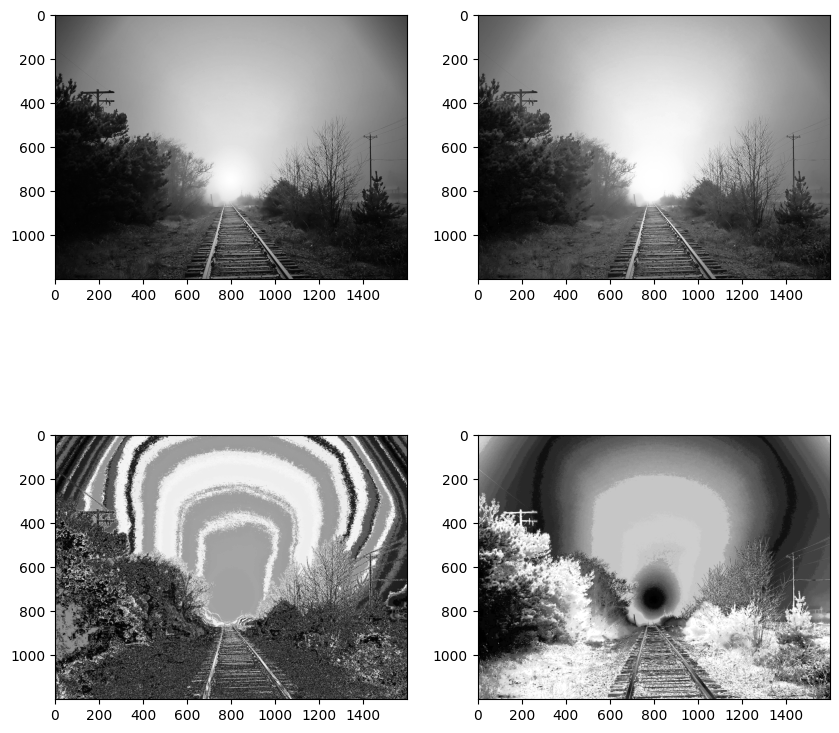

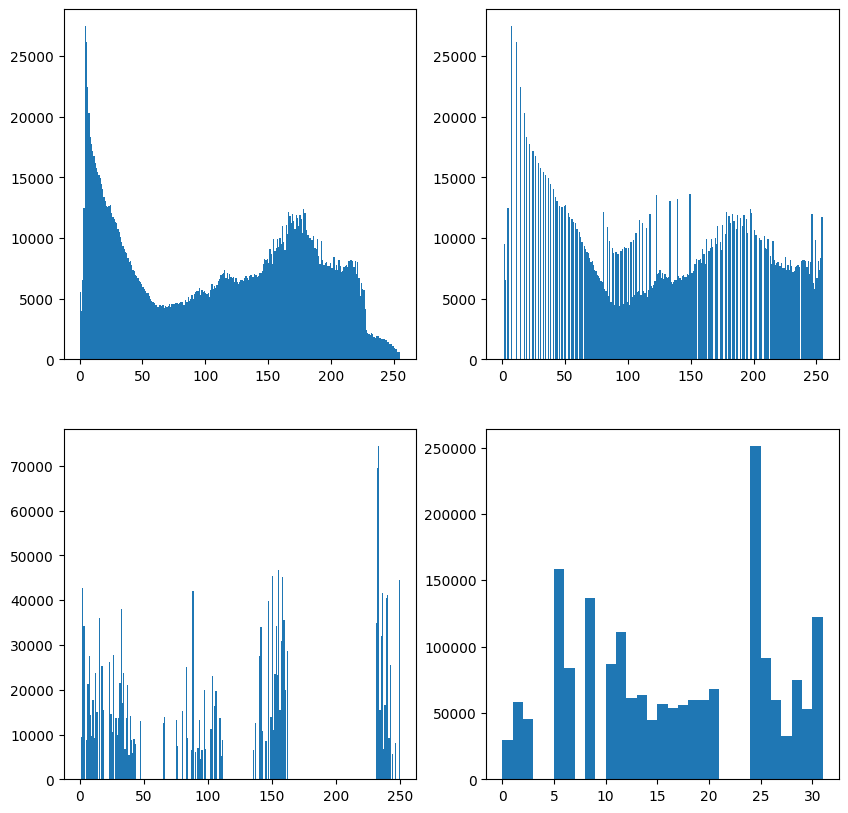

In [12]:
do_lab(img_path + 'photo1.jpg')

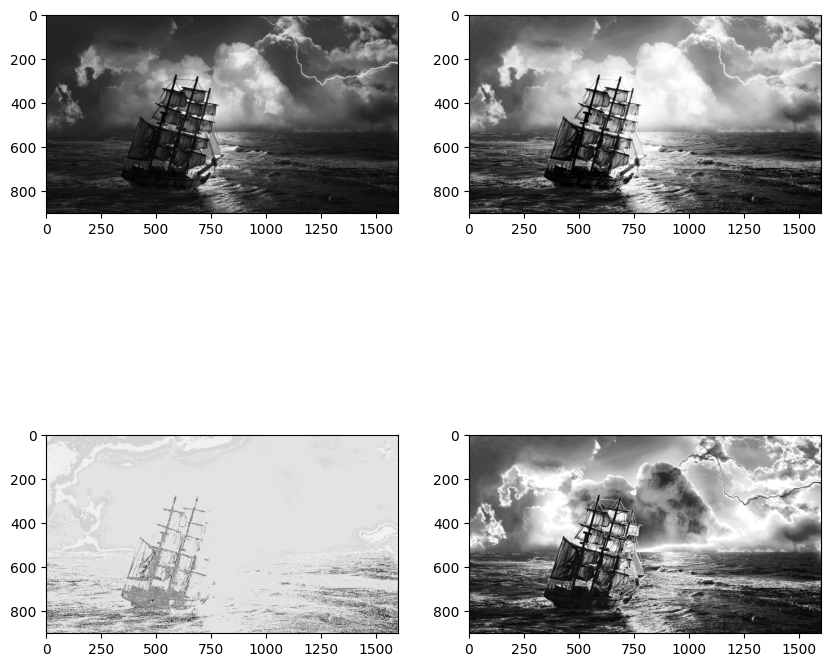

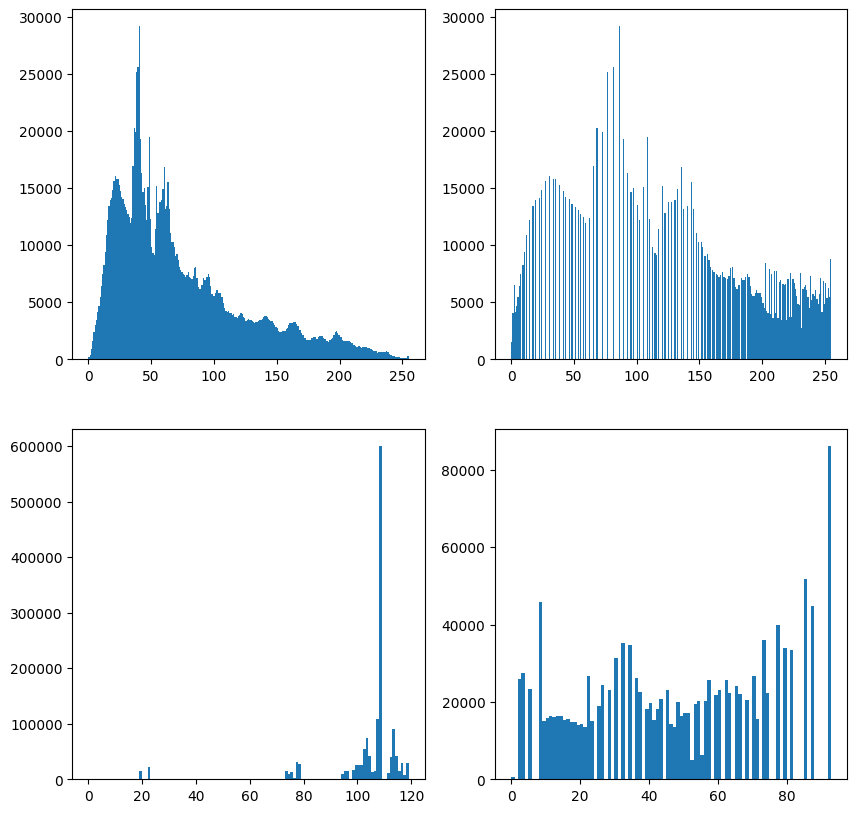

In [13]:
do_lab(img_path + 'photo2.jpg')

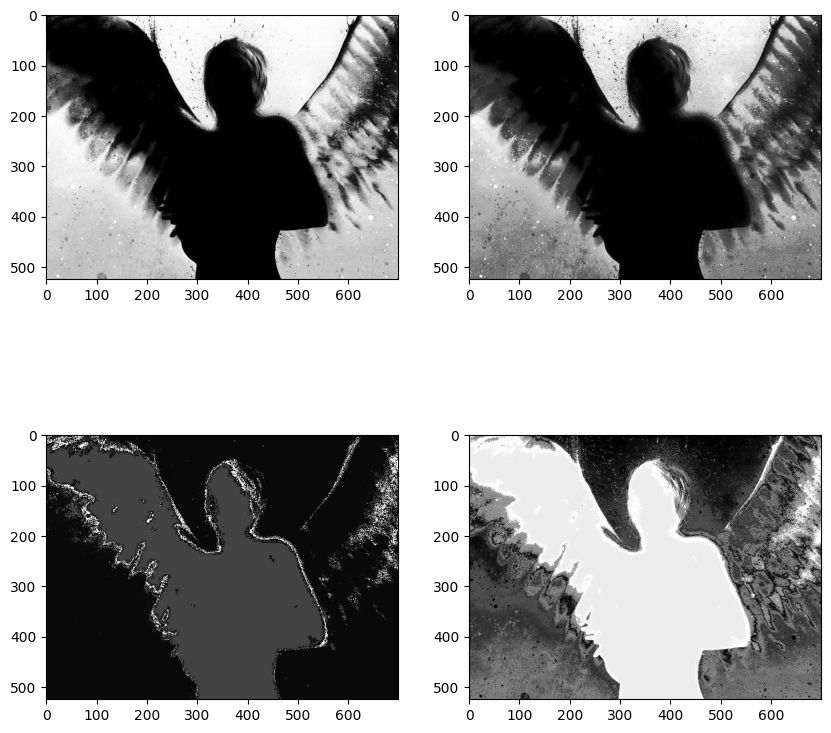

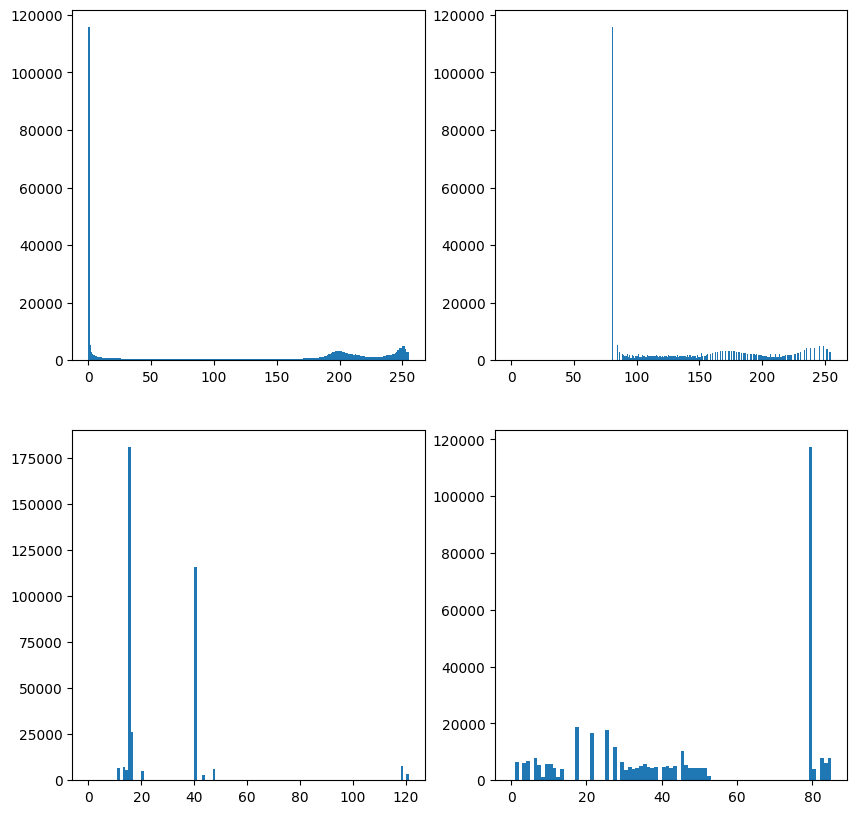

In [14]:
do_lab(img_path + 'photo3.jpg')

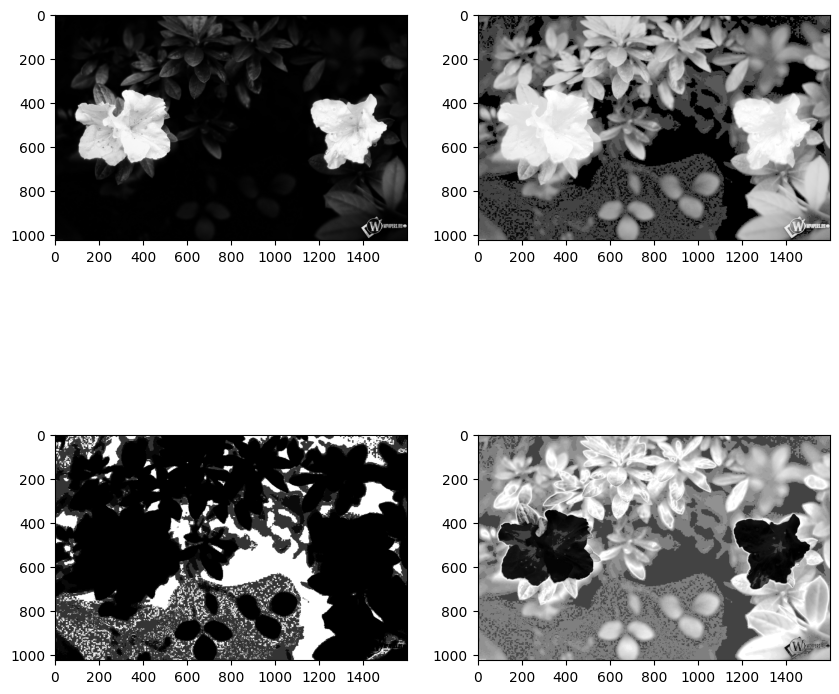

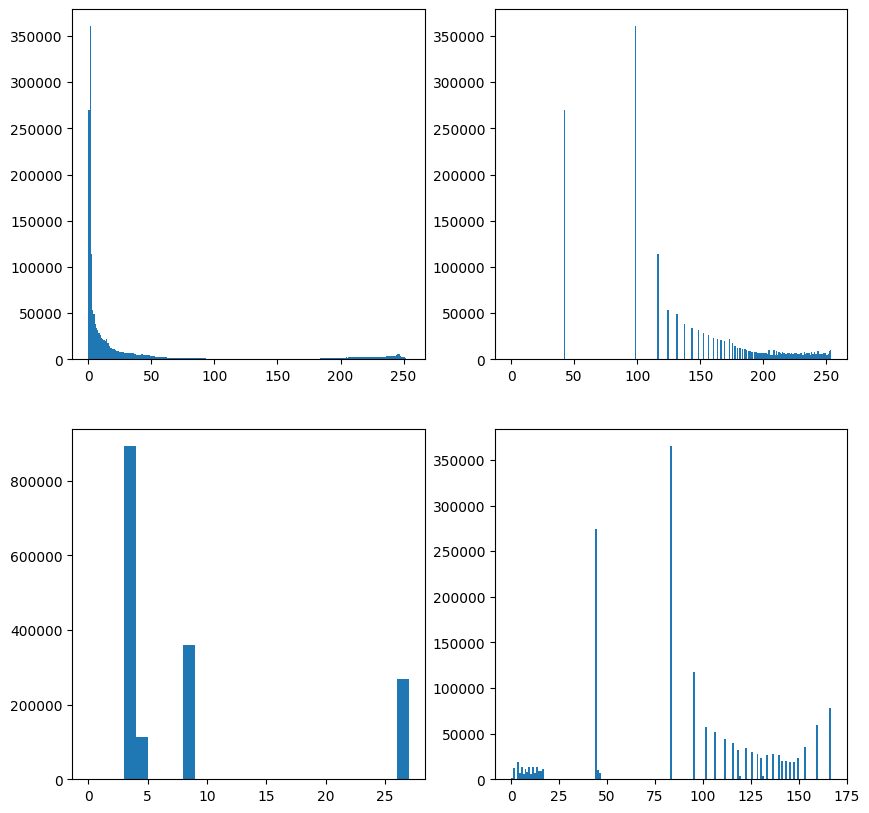

In [15]:
do_lab(img_path + 'photo4.jpg')